# librosa test

librosa is a powerful module in python to process .wav files. We can use this module to get a .wav file's information.

In [69]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# basic
data, sample_rate = librosa.load("./320568_3.wav",sr=32700)
data
sample_rate # the default sample rate of librosa is 22050. Also we can use default or specified sample rate.

32700

In [70]:
# spectrogram
spectrogram = librosa.feature.melspectrogram(y=data,sr=sample_rate)
spectrogram.shape

(128, 128)

[[17.296606  17.146759  16.538942  ... 16.676075  16.324547  17.64403  ]
 [14.2015915  9.141909   9.405857  ... 15.986925  14.463306  14.451021 ]
 [14.270052  10.156458  11.672747  ... 16.777744  18.497602  15.868697 ]
 ...
 [57.86798   55.61853   55.617645  ... 57.488075  56.8086    58.158287 ]
 [65.14049   62.54402   61.64933   ... 60.814598  60.732132  62.854263 ]
 [67.81835   68.67962   71.20504   ... 70.053375  71.02145   72.03626  ]]
(128, 128)


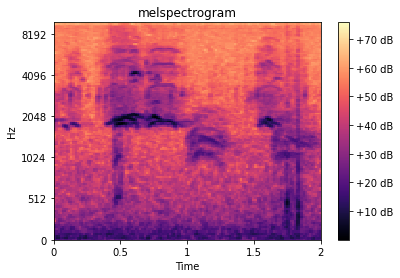

In [71]:
# plot the spectrogram
fig, ax = plt.subplots()
S_dB = - librosa.power_to_db(spectrogram,ref=np.max)
print(S_dB)
print(S_dB.shape)
img = librosa.display.specshow(S_dB,x_axis='time',y_axis='mel',sr=sample_rate,fmax=10000,ax=ax)
fig.colorbar(img,ax=ax,format='%+2.0f dB')
ax.set(title="melspectrogram")
plt.show()

In [72]:
# direct plot the spectrogram

In [73]:
# MFCC (梅尔频率倒谱系数)
# mel频率分析基于人类听觉感知实验。只关注人类耳朵可以听到的频率分量
mfcc = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
mfcc.shape

(40, 128)